<a href="https://colab.research.google.com/github/Hyenni/analysis_Astronomy_Data/blob/master/horsehead_fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1. Understanding Data

### SAMPLE 01. Download a sample FITS file

In [92]:
import urllib
urllib.request.urlretrieve("http://data.astropy.org/tutorials/FITS-images/HorseHead.fits", "HorseHead.fits")

('HorseHead.fits', <http.client.HTTPMessage at 0x7fed658404a8>)

###SAMPLE 02. Load a header of a FITS file

cf) FITS Format: Header Unit

                1                2                3                 4  ~~~ 8
1234567890123456789012345678901234567890 ~~~ 890
-------------------------------------------------------------
####Structure
  
* KEYNAME

* = 9번째

* value => =과 /사이 

* /

* comment string

In [93]:
# Initialize variables.
file_path = "HorseHead.fits"
header = ""

# Open a file.
file = open("HorseHead.fits", "rb")

# Read a header from the file.
end_found = False

while(end_found == False):
	buffer = file.read(2880)

	if(buffer == ""):
		break

	buffer = buffer.decode("ascii") #change text (handing)
	header = header + buffer

	for i in range(80):
		record = buffer[i*80:(i+1)*80]
		if(record.startswith('END')):  #if 'END' exist, header finish
			end_found = True
			break

if (end_found == False):
	print("The file is not correct FITS format.")

  
# Close the file.
#file.close()
            
print (header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

### SAMPLE 03. Decode a FITS header.

In [94]:
def get_value(header, keyword):
	value = ""
	records = int(len(header) / 80)

	for i in range(records):
		record = header[i*80:(i+1)*80]
		if(record.startswith(keyword)):
			begin = 9;
			end = record.find('/')
			value = record[begin:end].strip()
			break
		if(record.startswith("END")):
			break

	return value

  
# Decode the header.
bitpix = 0
naxis = 0
naxis1 = 0
naxis2 = 0
bscale = 1.0
bzero = 0

value = get_value(header, "BITPIX")
if(value != ""):	bitpix = int(value)

value = get_value(header, "NAXIS")
if(value != ""):	naxis = int(value)

value = get_value(header, "NAXIS1")
if(value != ""):	naxis1 = int(value)

value = get_value(header, "NAXIS2")
if(value != ""):	naxis2 = int(value)

value = get_value(header, "BSCALE")
if(value != ""):	bscale = float(value)
  
value = get_value(header, "BZERO")
if(value != ""):	bzero = int(value)
  
print("BITPIX = ", bitpix)
print("NAXIS = ", naxis)
print("NAXIS1 = ", naxis1)
print("NAXIS2 = ", naxis2)
print("BSCALE = ", bscale)
print("BZERO = ", bzero)

BITPIX =  16
NAXIS =  2
NAXIS1 =  891
NAXIS2 =  893
BSCALE =  1.0
BZERO =  0


### SAMPLE 04. Load a FITS data.

In [95]:
import numpy as np

# Read a data from the file.

# binary data (byte)
data = file.read(naxis1 * naxis2 * int(bitpix/8))
print (data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [96]:
# 1-D array (signed short)
data = np.frombuffer(data, dtype=np.dtype(">i2"))
print(data)
print(data.dtype)

[ 7201  6642  6642 ... 11987 12546 12546]
>i2


In [97]:
# 2-D array (signed short)
#naxis2 = height
#naxis1 = width

data = data.reshape((naxis2, naxis1))
print(data)
print(data.dtype)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]
>i2


In [100]:
#data = (data + bzero) / bscale
#print(data)
#print(data.dtype)

[[ 7201.  6642.  6642. ...  9498.  9498. 10057.]
 [ 6642.  6363.  6642. ... 10057. 10616. 10616.]
 [ 6922.  6642.  6922. ... 10337. 11175. 10616.]
 ...
 [ 5412.  5132.  5412. ... 13000. 12580. 12021.]
 [ 5796.  5517.  5796. ... 12546. 12546. 11987.]
 [ 5796.  5796.  6076. ... 11987. 12546. 12546.]]
float64


###SAMPLE 05. Display a FITS data.

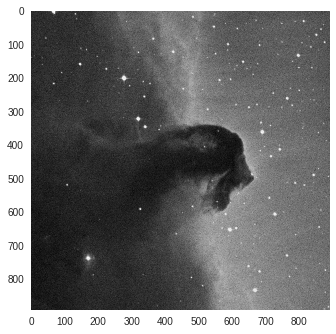

In [99]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(data, cmap=cm.gray)
plt.grid(None)
plt.show()